In [1]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nilearn.plotting as nlp
from nilearn_plotting_custom import plot_surf
import hcp_utils as hcp
from hcp_tools import extract_cortex
from hcp_tools import load_meshes
from hcp_tools import load_data
from hcp_tools import load_flatmaps_59k
from analysis import simple_ridgeCV

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
#load subject data
subject=100610
feature='mfs'
n_movies=4
X,Y,vertex_info = load_data(subject,feature,n_movies)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
#run 5 fold ridgeCV, return mean scores and mean weights
scores_mean,weights_mean = simple_ridgeCV(X,Y)

training... [ 579  580  581 ... 2877 2878 2879]


In [ ]:
#load meshes from HCP1200 open access
flatmeshes=load_flatmaps_59k()
# surf_path_msm = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.L.inflated_1.6mm_MSMAll.59k_fs_LR.surf.gii'
# surf_path_msm = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/MNINonLinear/fsaverage_LR59k/100610.L.inflated_1.6mm_MSMAll.59k_fs_LR.surf.gii'

# mesh59k_msm = load_meshes(example_filename=surf_path_msm)
#get vertex info from original file
#temp_img = nb.Cifti2Image(cut_score.reshape((1,170494)), img.header)


#get cortex data from cut_scores output
cut_score_cortex_data = hcp.cortex_data(scores_mean, fill=0, vertex_info=vertex_info)
cut_score_cortex_dataL = hcp.left_cortex_data(scores_mean, fill=0, vertex_info=vertex_info)
cut_score_cortex_dataR = hcp.right_cortex_data(scores_mean, fill=0, vertex_info=vertex_info)

In [29]:
#plot
#nlp.view_surf(mesh59k_msm.inflated,surf_map=cut_score_cortex_data,vmax=0.2,threshold=0.01)

In [ ]:
from nilearn import surface
coord, faces = surface.load_surf_mesh(surf_path_msm)
#nlp.view_surf(surf_path_msm,surf_map=cut_score_cortex_dataL,vmax=0.2,threshold=0.01)
nlp.plot_surf(mesh59k_msm.inflated_right,surf_map=cut_score_cortex_dataR,vmin=0,vmax=0.2,threshold=0.01,view='dorsal',colorbar=True)

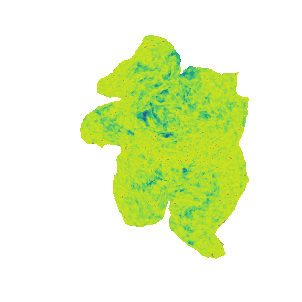

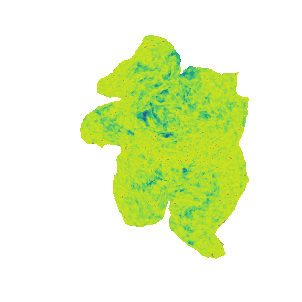

In [43]:
from nilearn import surface
coord, faces = surface.load_surf_mesh(surf_path_msm)
#nlp.view_surf(surf_path_msm,surf_map=cut_score_cortex_dataL,vmax=0.2,threshold=0.01)
nlp.plot_surf(mesh59k_msm.inflated_right,surf_map=cut_score_cortex_dataL,vmax=0.2,threshold=0.01,view='dorsal')

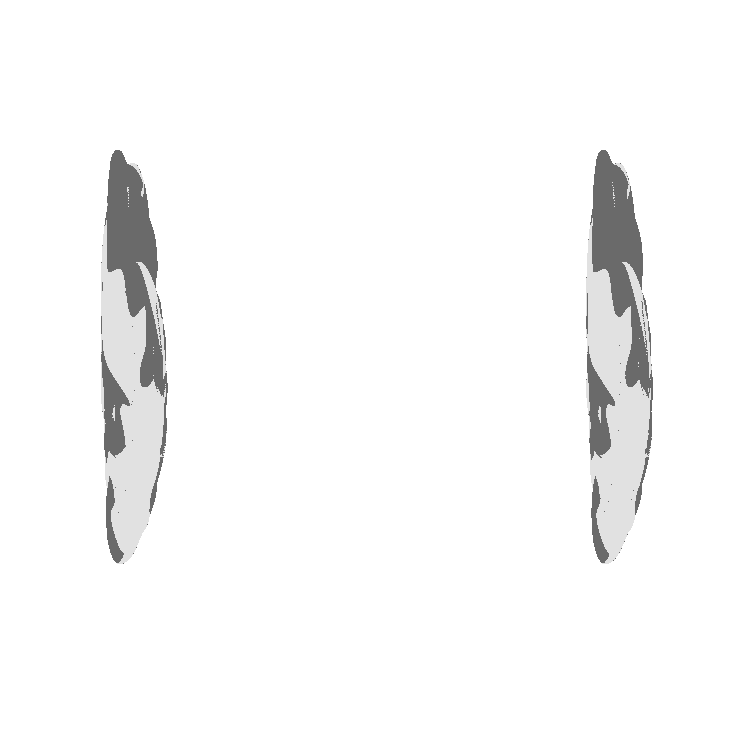

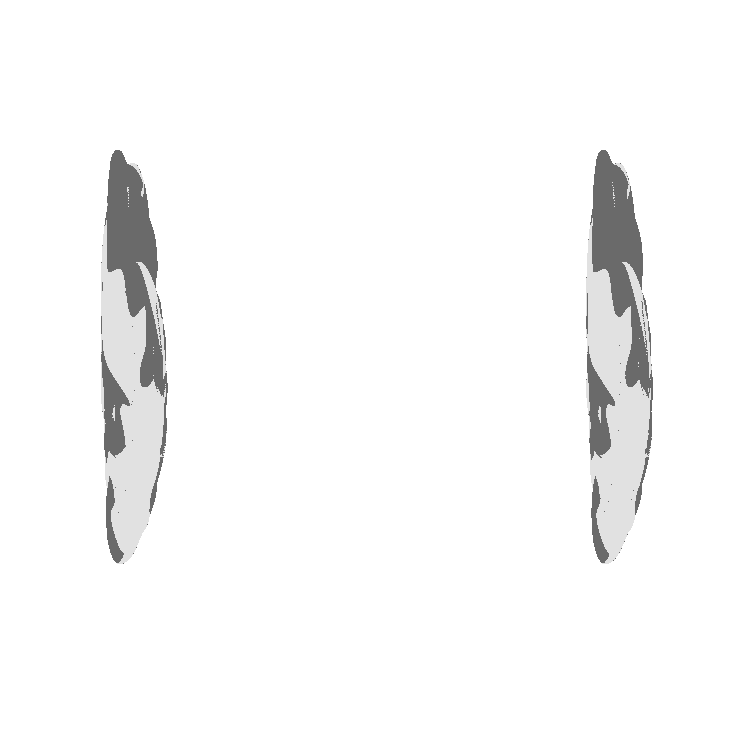

In [26]:
plot_surf(flatmeshes.flat)

In [ ]:
plot_surf(flatmeshes.flat_left,\
            hcp.cortex_data(cut_score_new), cmap='viridis',symmetric_cmap=False, vmin=0, vmax=0.25, colorbar=True,avg_method='median',#figure=fig,\
            bg_map=hcp.mesh.sulc,title=f'title',\
            data_alpha=hcp.cortex_data(np.ones(cut_score_new.shape)),#np.ones(data_alpha05.shape)),\
            data_remove=hcp.cortex_data(data_remove))

In [16]:
# load a 59k flatmap


In [38]:
from hcp_tools import load_flatmaps_59k

ImportError: cannot import name 'load_flatmaps_59k' from 'hcp_tools' (/om2/vast/gablab/jsmentch/projects/nat_img/code/hcp_tools.py)

In [34]:
meshes.flat

(array([[   0.      , -115.62291 ,  169.59259 ],
        [   0.      , -190.34683 ,  123.08588 ],
        [   0.      , -255.30742 ,   44.712387],
        ...,
        [   0.      ,  365.4124  ,  -26.98692 ],
        [   0.      ,  364.5382  ,  -26.791899],
        [   0.      ,  365.91803 ,  -25.534286]], dtype=float32),
 array([[    12,      0,     88],
        [    12,     88,    240],
        [    13,     12,    240],
        ...,
        [118583,  98254,  74542],
        [ 74543, 118583,  74542],
        [ 74542,  98254,  59301]], dtype=int32))

In [37]:
def test():
    from nilearn import surface
    from sklearn.utils import Bunch
    surf_path_msm = '../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.L.inflated_1.6mm_MSMAll.59k_fs_LR.surf.gii'
    meshes = Bunch()
    for hemisphere, hemisphere_name in [('L', 'left'), ('R', 'right')]:
        coord, faces = surface.load_surf_mesh(surf_path_msm)
        coordnew = np.zeros_like(coord)
        coordnew[:, 1] = coord[:, 0]
        coordnew[:, 2] = coord[:, 1]
        coordnew[:, 0] = 0
        coord = coordnew
        meshes['flat'+'_'+hemisphere_name] = coord, faces
    coordl, facesl = meshes['flat_left']
    coordr, facesr = meshes['flat_right']
    coordlnew = coordl.copy()
    coordlnew[:, 1] = coordl[:, 1] - 250.0
    coordrnew = coordr.copy()
    coordrnew[:, 1] = coordr[:, 1] + 250.0
    meshes['flat'] = hcp.combine_meshes( (coordlnew, facesl), (coordrnew, facesr) )
    return meshes

In [ ]:
X = img.get_fdata() #load data from nii
X_t = X[17:] #trim beginning, first 17 TRs
Ybrain = X_t[:1009] #trim end to end of film    braintrain.append(s_brain[:-200,:]) #roughly 80 20 split, trim the last 200 TRs of each subject to save as test set
Ybrain = Ybrain[:,union_ind_ind[0]]
#     Ybrain_train = s_brain[:-200,:]
#     Ybrain_test = s_brain[-200:,:]
#as in https://nilearn.github.io/auto_examples/02_decoding/plot_miyawaki_encoding.html#sphx-glr-auto-examples-02-decoding-plot-miyawaki-encoding-py
Ybrain = np.nan_to_num(Ybrain)
estimator = RidgeCV(alphas=[0.1, 1.0, 10.0, 100])
cv = KFold(n_splits=5)
scores = []
for train, test in cv.split(X=X_as):
    train = train[2:-2] #remove the first and last 3 seconds of each test and train partition
    test = test[2:-2]
    #print('train, test')
    # we train the Ridge estimator on the training set
    # and predict the fMRI activity for the test set
    predictions = estimator.fit(X_as.reshape(-1, X_as.shape[1])[train], Ybrain[train]).predict(
        X_as.reshape(-1, X_as.shape[1])[test])
    # we compute how much variance our encoding model explains in each voxel
    scores.append(r2_score(Ybrain[test], predictions,
                           multioutput='raw_values'))
cut_score = np.mean(scores, axis=0)
#cut_score[cut_score < 0] = 0

cut_score_new = np.zeros((union_ind.shape[0]))
for i,ind in enumerate(union_ind_ind[0]):
    cut_score_new[ind]=cut_score[i]
all_scores.append(cut_score_new)
#make a temp valid cifti2img
#temp_img = nb.Cifti2Image(cut_score.reshape((1,91282)), img.header)
plot_surf(hcp.mesh.flat,\
    hcp.cortex_data(cut_score_new), cmap='viridis',symmetric_cmap=False, vmin=0, vmax=0.25, colorbar=True,avg_method='median',#figure=fig,\
    bg_map=hcp.mesh.sulc,title=f'voxel-wise Encoding Model, R2 {sub} 5-fold cv {featname}',\
    data_alpha=hcp.cortex_data(np.ones(cut_score_new.shape)),#np.ones(data_alpha05.shape)),\
    data_remove=hcp.cortex_data(data_remove),output_file=f'2021_02_05_low_level/{sub}-{featname}_ridgecv.png')
#plot_dscalar(temp_img, title=f'voxel-wise Encoding Model, R2 {sub} 5-fold cv {featname}',colorbar=True, vmin=0, vmax=1, plot_abs=False, threshold=None, cmap='bwr', output_file=f'2021_02_05_low_level/{sub}-{featname}_ridgecv.png')
all_scores=np.asarray(all_scores)
all_scores_mean=np.mean(all_scores,axis=0)
plot_surf(hcp.mesh.flat,\
hcp.cortex_data(all_scores_mean), cmap='viridis',symmetric_cmap=False, vmin=0, vmax=0.25, colorbar=True,avg_method='median',#figure=fig,\
bg_map=hcp.mesh.sulc,title=f'voxel-wise Encoding Model, R2 {sub} 5-fold cv {featname}',\
data_alpha=hcp.cortex_data(np.ones(cut_score_new.shape)),#np.ones(data_alpha05.shape)),\
data_remove=hcp.cortex_data(data_remove),output_file=f'2021_02_05_low_level/all-{featname}_ridgecv.png')

## 